In [172]:
atl03_seg_dt <- data.table::data.table(
  longitude = atl03_h5[["gt1r/geolocation/reference_photon_lon"]][],
  latitude = atl03_h5[["gt1r/geolocation/reference_photon_lat"]][]
)

atl03_seg_dt[, I := .I]

nrow(atl03_seg_dt)
head(atl03_seg_dt)


[1] 181027

longitude,latitude,I
<dbl>,<dbl>,<int>
-103.7555,59.49118,1
-103.7556,59.49100,2
-103.7556,59.49082,3
-103.7556,59.49064,4
-103.7557,59.49047,5
-103.7557,59.49029,6


In [173]:
seg_geom <- terra::vect(
  atl03_seg_dt,
  geom = c('longitude', 'latitude')
)
seg_geom

 class       : SpatVector 
 geometry    : points 
 dimensions  : 181027, 1  (geometries, attributes)
 extent      : -108.3903, -103.7555, 26.98748, 59.49118  (xmin, xmax, ymin, ymax)
 coord. ref. :  
 names       :     I
 type        : <int>
 values      :     1
                   2
                   3

In [175]:
inter_geom <- terra::intersect(seg_geom, v2)


 class       : SpatVector 
 geometry    : points 
 dimensions  : 9, 1  (geometries, attributes)
 extent      : -103.7604, -103.7601, 59.46722, 59.46865  (xmin, xmax, ymin, ymax)
 coord. ref. :  
 names       :     I
 type        : <int>
 values      :   127
                 128
                 129

In [185]:
mask <- inter_geom[["I"]][[1]]


In [188]:
atl03_seg_dt_clipped <- data.table::data.table(
  longitude = atl03_h5[["gt1r/geolocation/reference_photon_lon"]][mask],
  latitude = atl03_h5[["gt1r/geolocation/reference_photon_lat"]][mask],
  segment_id = atl03_h5[["gt1r/geolocation/segment_id"]][mask],
  segment_ph_cnt = atl03_h5[["gt1r/geolocation/segment_ph_cnt"]][mask],
  ph_index_beg = atl03_h5[["gt1r/geolocation/ph_index_beg"]][mask]
)
head(atl03_seg_dt_clipped)

longitude,latitude,segment_id,segment_ph_cnt,ph_index_beg
<dbl>,<dbl>,<int>,<int>,<int>
-103.7601,59.46865,671215,116,11096
-103.7601,59.46848,671216,123,11212
-103.7602,59.46829,671217,113,11335
-103.7602,59.46811,671218,151,11448
-103.7602,59.46793,671219,123,11599
-103.7603,59.46775,671220,140,11722


In [191]:
seq_lens_simplify <- Rcpp::cppFunction("
IntegerVector seq_lens_simplify(IntegerVector from, IntegerVector length_out) {
  IntegerVector output(sum(length_out));
  int pos = 0;
  for (int ii = 0; ii < from.length(); ii++) {
    for (int jj: Rcpp::seq(from[ii], from[ii] + length_out[ii] - 1)) {
      output[pos++] = jj;
    }
  }
  return output;
}
")

In [317]:
photons_mask <- seq_lens_simplify(atl03_seg_dt_clipped$ph_index_beg, atl03_seg_dt_clipped$segment_ph_cnt)
head(atl03_seg_dt_clipped$ph_index_beg)
head(photons_mask)

[1] 11096 11212 11335 11448 11599 11722

[1] 11096 11097 11098 11099 11100 11101

In [424]:
devtools::load_all()

ℹ Loading ICESat2VegR


Creating a new generic function for 'clip' in package 'ICESat2VegR'

Creating a generic function from function 'map' in package 'ICESat2VegR'


##----------------------------------------------------------------##
ICESat2VegR package, version 0.0.1, Released 2024-03-06 UTC
This package is based upon work supported by the NASA ICESat-2 under grants No. ****. 
##----------------------------------------------------------------##



In [428]:
atl03_atl08_dt_clip <- ATL03_ATL08_photons_attributes_dt_join(atl03_h5_clip, atl08_h5_clip)


  |==================                                                    |  25%   ph_segment_id    lon_ph   lat_ph     h_ph quality_ph solar_elevation
           <int>     <num>    <num>    <num>      <int>           <num>
1:        671215 -103.7601 59.46874 325.9640          0        23.50526
2:        671215 -103.7601 59.46874 278.7379          0        23.50526
3:        671215 -103.7601 59.46873 429.6898          0        23.50526
4:        671215 -103.7601 59.46872 416.0034          0        23.50526
5:        671215 -103.7601 59.46872 405.5378          0        23.50526
6:        671215 -103.7601 59.46872 382.8574          0        23.50526
   dist_ph_along dist_ph_across
           <num>          <num>
1:     0.3446315       9648.384
2:     0.1905272       9649.371
3:     1.3921306       9646.220
4:     2.0568457       9646.509
5:     2.0235429       9646.728
6:     1.9488899       9647.201
  |======================================================================| 100%


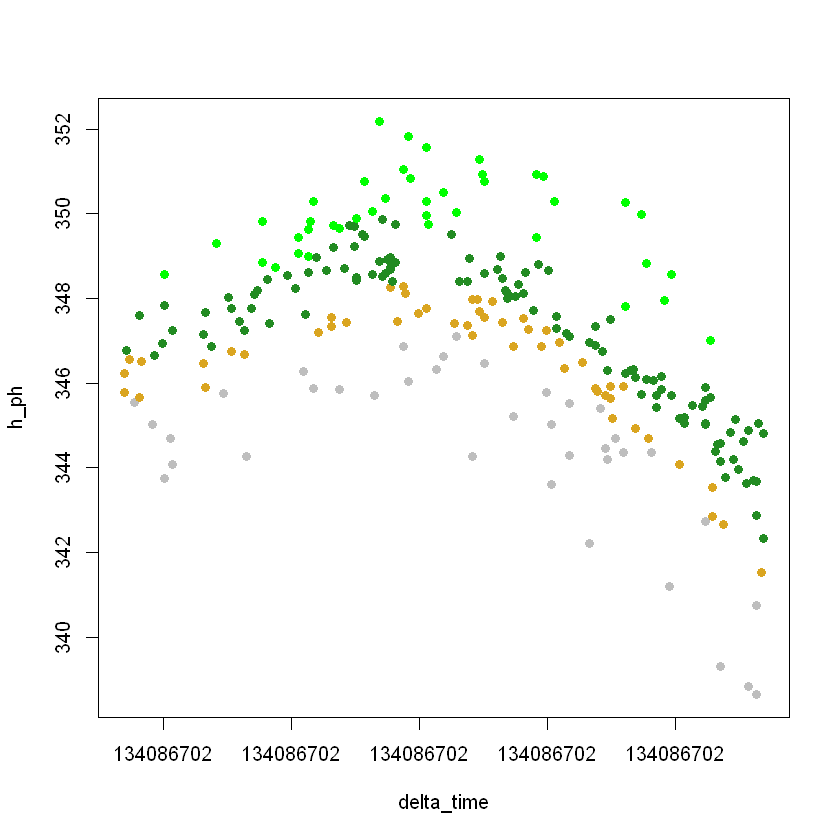

In [429]:
with(na.omit(atl03_atl08_dt_clip), plot(delta_time, h_ph, col=c("gray", "goldenrod", "forestgreen", "green")[classed_pc_flag + 1], pch = 16))